## MULTIPLE LINEAR REGRESSION

### 1.Perform exploratory data analysis (EDA) to gain insights into the dataset. Provide visualizations and summary statistics of the variables. Pre process the data to apply the MLR.

In [260]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [261]:
or_data = pd.read_csv('ToyotaCorolla - MLR.csv')

In [262]:
or_data.head()

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170


In [263]:
or_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null   int64 
 6   cc         1436 non-null   int64 
 7   Doors      1436 non-null   int64 
 8   Cylinders  1436 non-null   int64 
 9   Gears      1436 non-null   int64 
 10  Weight     1436 non-null   int64 
dtypes: int64(10), object(1)
memory usage: 123.5+ KB


In [264]:
toyota = or_data.copy()

In [265]:
toyota.shape

(1436, 11)

### Correct the datatypes

In [267]:
toyota['Doors'] = toyota['Doors'].astype('category')
toyota['Fuel_Type'] = toyota['Fuel_Type'].astype('category')
toyota['Automatic'] = toyota['Automatic'].astype('category')

In [268]:
toyota.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   Price      1436 non-null   int64   
 1   Age_08_04  1436 non-null   int64   
 2   KM         1436 non-null   int64   
 3   Fuel_Type  1436 non-null   category
 4   HP         1436 non-null   int64   
 5   Automatic  1436 non-null   category
 6   cc         1436 non-null   int64   
 7   Doors      1436 non-null   category
 8   Cylinders  1436 non-null   int64   
 9   Gears      1436 non-null   int64   
 10  Weight     1436 non-null   int64   
dtypes: category(3), int64(8)
memory usage: 94.5 KB


### Convert Fuel_Type to dummy variables

In [270]:
toyota = pd.get_dummies(toyota, columns=["Fuel_Type"])
print(toyota.head()) 

   Price  Age_08_04     KM  HP Automatic    cc Doors  Cylinders  Gears  \
0  13500         23  46986  90         0  2000     3          4      5   
1  13750         23  72937  90         0  2000     3          4      5   
2  13950         24  41711  90         0  2000     3          4      5   
3  14950         26  48000  90         0  2000     3          4      5   
4  13750         30  38500  90         0  2000     3          4      5   

   Weight  Fuel_Type_CNG  Fuel_Type_Diesel  Fuel_Type_Petrol  
0    1165          False              True             False  
1    1165          False              True             False  
2    1165          False              True             False  
3    1165          False              True             False  
4    1170          False              True             False  


In [271]:
toyota.head()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
0,13500,23,46986,90,0,2000,3,4,5,1165,False,True,False
1,13750,23,72937,90,0,2000,3,4,5,1165,False,True,False
2,13950,24,41711,90,0,2000,3,4,5,1165,False,True,False
3,14950,26,48000,90,0,2000,3,4,5,1165,False,True,False
4,13750,30,38500,90,0,2000,3,4,5,1170,False,True,False


In [272]:
toyota.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Price             1436 non-null   int64   
 1   Age_08_04         1436 non-null   int64   
 2   KM                1436 non-null   int64   
 3   HP                1436 non-null   int64   
 4   Automatic         1436 non-null   category
 5   cc                1436 non-null   int64   
 6   Doors             1436 non-null   category
 7   Cylinders         1436 non-null   int64   
 8   Gears             1436 non-null   int64   
 9   Weight            1436 non-null   int64   
 10  Fuel_Type_CNG     1436 non-null   bool    
 11  Fuel_Type_Diesel  1436 non-null   bool    
 12  Fuel_Type_Petrol  1436 non-null   bool    
dtypes: bool(3), category(2), int64(8)
memory usage: 97.2 KB


In [273]:
toyota.columns

Index(['Price', 'Age_08_04', 'KM', 'HP', 'Automatic', 'cc', 'Doors',
       'Cylinders', 'Gears', 'Weight', 'Fuel_Type_CNG', 'Fuel_Type_Diesel',
       'Fuel_Type_Petrol'],
      dtype='object')

### Rename the column names

In [275]:
toyota.columns

Index(['Price', 'Age_08_04', 'KM', 'HP', 'Automatic', 'cc', 'Doors',
       'Cylinders', 'Gears', 'Weight', 'Fuel_Type_CNG', 'Fuel_Type_Diesel',
       'Fuel_Type_Petrol'],
      dtype='object')

In [276]:
toyota.rename(columns = {'Age_08_04' : 'Age'}, inplace = True)

In [277]:
toyota.columns

Index(['Price', 'Age', 'KM', 'HP', 'Automatic', 'cc', 'Doors', 'Cylinders',
       'Gears', 'Weight', 'Fuel_Type_CNG', 'Fuel_Type_Diesel',
       'Fuel_Type_Petrol'],
      dtype='object')

### Checking null values

In [279]:
toyota.isnull().sum()

Price               0
Age                 0
KM                  0
HP                  0
Automatic           0
cc                  0
Doors               0
Cylinders           0
Gears               0
Weight              0
Fuel_Type_CNG       0
Fuel_Type_Diesel    0
Fuel_Type_Petrol    0
dtype: int64

### Box plot to check outliers

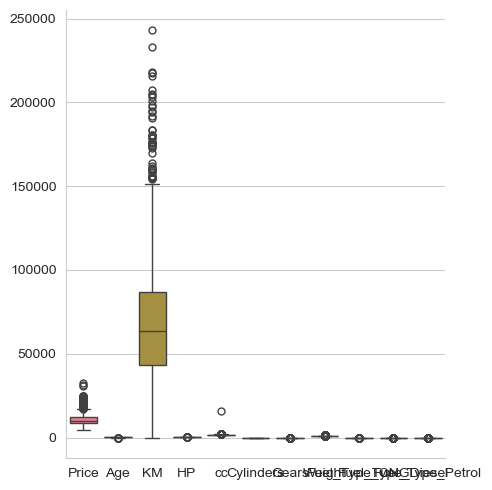

In [281]:
sns.catplot(data = toyota, kind = 'box')
plt.show()

In [282]:
numeric_cols = toyota.select_dtypes(include=['float64', 'int64']).columns
outliers = {}

for col in numeric_cols:
    Q1 = toyota[col].quantile(0.25)
    Q3 = toyota[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    outliers[col] = toyota[(toyota[col] < lower_limit) | (toyota[col] > upper_limit)].shape[0]

In [283]:
outliers

{'Price': 110,
 'Age': 7,
 'KM': 49,
 'HP': 11,
 'cc': 123,
 'Cylinders': 0,
 'Gears': 46,
 'Weight': 66}

### Correlation Matrix

In [285]:
toyota_corr = toyota[['Price', 'Age', 'KM', 'HP', 'cc', 'Weight']].corr()
toyota_corr

,Price,Age,KM,HP,cc,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.581198
Age,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.089614
cc,0.126389,-0.098084,0.102683,0.035856,1.000000,0.335637
Weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,1.000000


### Scatterplot between variables along with histograms

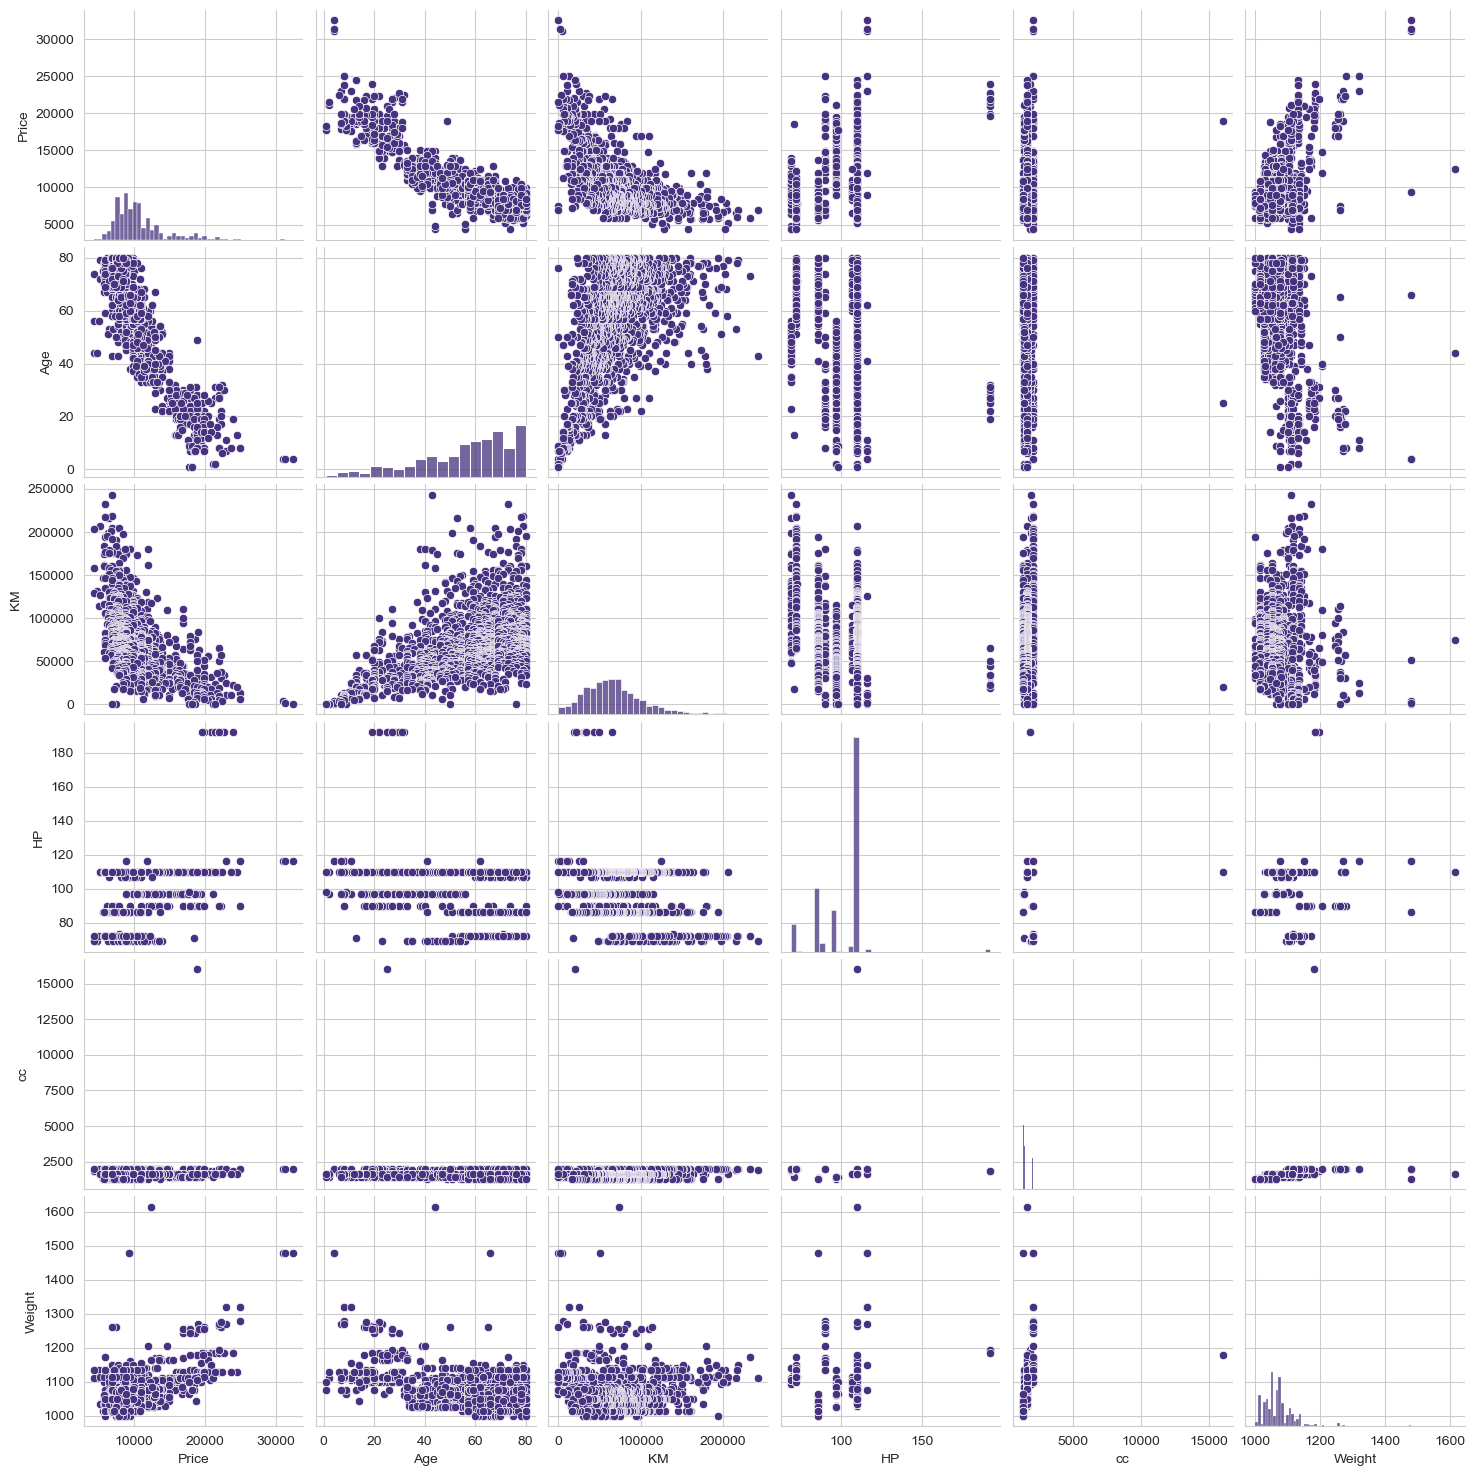

In [287]:
sns.set_palette('viridis')

sns.set_style(style='whitegrid')
sns.pairplot(toyota[['Price', 'Age', 'KM', 'HP', 'cc', 'Weight']])
plt.show()

### Preparing a model

In [289]:
import statsmodels.formula.api as smf 
mlr = smf.ols('Price~Age+KM+HP+cc+Weight+Fuel_Type_Diesel+Fuel_Type_Petrol+Automatic+Doors+Gears',data=toyota)
model = mlr.fit()

In [290]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     762.1
Date:                Fri, 07 Feb 2025   Prob (F-statistic):               0.00
Time:                        11:18:29   Log-Likelihood:                -12367.
No. Observations:                1436   AIC:                         2.476e+04
Df Residuals:                    1423   BIC:                         2.483e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                -1.024e+04   1836.982     -5.573      0.000   -1.38e+04   -6633.380
Fuel_Type_Diesel[T.True]   489.8450    383.504      1.277      0.202    -262.449    1242.139
Fuel_Type_Petrol[T.True]  1179.3317    338.753      3.481      0.001     514.823    1843.840
Automatic[T.1]             261.4072    161.962      1.614      0.107     -56.302     579.117
Doors[T.3]                -509.0788    948.311     -0.537      0.591   -2369.317    1351.160
Doors[T.4]                -278.6027    953.899     -0.292      0.770   -2149.802    1592.596
Doors[T.5]                -579.2299    949.179     -0.610      0.542   -2441.170    1282.710
Age                       -123.5778      2.630    -46.979      0.000    -128.738    -118.418
KM                          -0.0175      0.001    -13.158      0.000      -0.020      -0.015
HP                          22.2280      3.627      6.128      0.000      15.113      29.343
cc                          -0.0569      0.092     -0.619      0.536      -0.237       0.123
Weight                      21.4891      1.258     17.079      0.000      19.021      23.957
Gears                      653.1216    198.324      3.293      0.001     264.084    1042.160
==============================================================================
Omnibus:                      293.131   Durbin-Watson:                   1.619
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3294.632
Skew:                          -0.607   Prob(JB):                         0.00
Kurtosis:                      10.320   Cond. No.                     4.76e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.76e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Coefficients

In [292]:
model.params

Intercept                  -10236.862671
Fuel_Type_Diesel[T.True]      489.844990
Fuel_Type_Petrol[T.True]     1179.331737
Automatic[T.1]                261.407208
Doors[T.3]                   -509.078768
Doors[T.4]                   -278.602656
Doors[T.5]                   -579.229928
Age                          -123.577844
KM                             -0.017514
HP                             22.227977
cc                             -0.056934
Weight                         21.489051
Gears                         653.121633
dtype: float64

### Calculating VIF

In [294]:
rsq_Age = smf.ols('Age~KM+HP+cc+Weight',data=toyota).fit().rsquared  
vif_Age = 1/(1-rsq_Age) 

rsq_KM = smf.ols('KM~Age+HP+cc+Weight',data=toyota).fit().rsquared  
vif_KM = 1/(1-rsq_KM) 

rsq_HP = smf.ols('HP~Age+KM+cc+Weight',data=toyota).fit().rsquared  
vif_HP = 1/(1-rsq_HP) 

rsq_cc = smf.ols('cc~Age+KM+HP+Weight',data=toyota).fit().rsquared  
vif_cc = 1/(1-rsq_cc) 

rsq_Weight = smf.ols('Weight~Age+KM+HP+cc',data=toyota).fit().rsquared  
vif_Weight = 1/(1-rsq_Weight) 

# Storing vif values in a data frame
d1 = {'Variables': ['Age', 'KM', 'HP', 'cc', 'Weight'], 'VIF': [vif_Age, vif_KM, vif_HP, vif_cc, vif_Weight]}
Vif_frame = pd.DataFrame(d1)
Vif_frame

,Variables,VIF
0,Age,1.873707
1,KM,1.632510
2,HP,1.141727
3,cc,1.145962
4,Weight,1.535507


### Residual Analysis

### Test for Normality of Residuals (Q-Q Plot)

In [297]:
model.resid

0      -2765.698473
1      -2061.190294
2      -2284.507460
3       -927.205653
4      -1906.723397
           ...     
1431   -1176.186684
1432    2727.395597
1433     224.069796
1434   -1151.259457
1435   -3579.699397
Length: 1436, dtype: float64

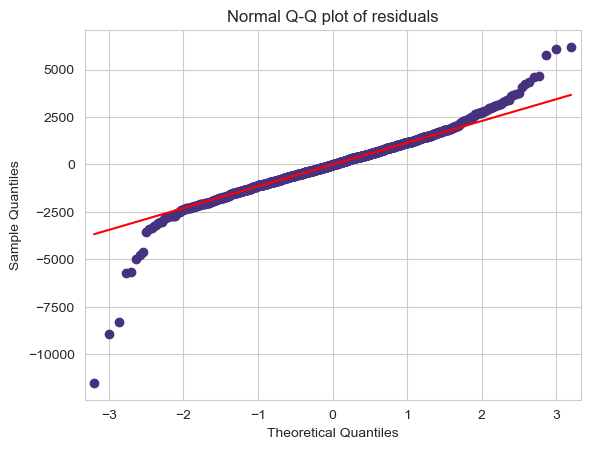

In [298]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

### Residual Plot for Homoscedasticity

In [300]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

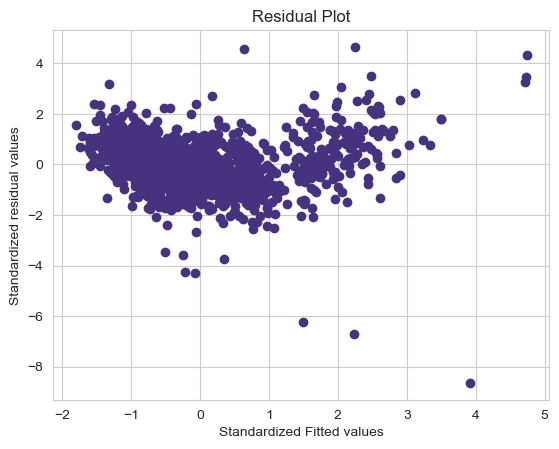

In [301]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

### Residual Vs Regressors

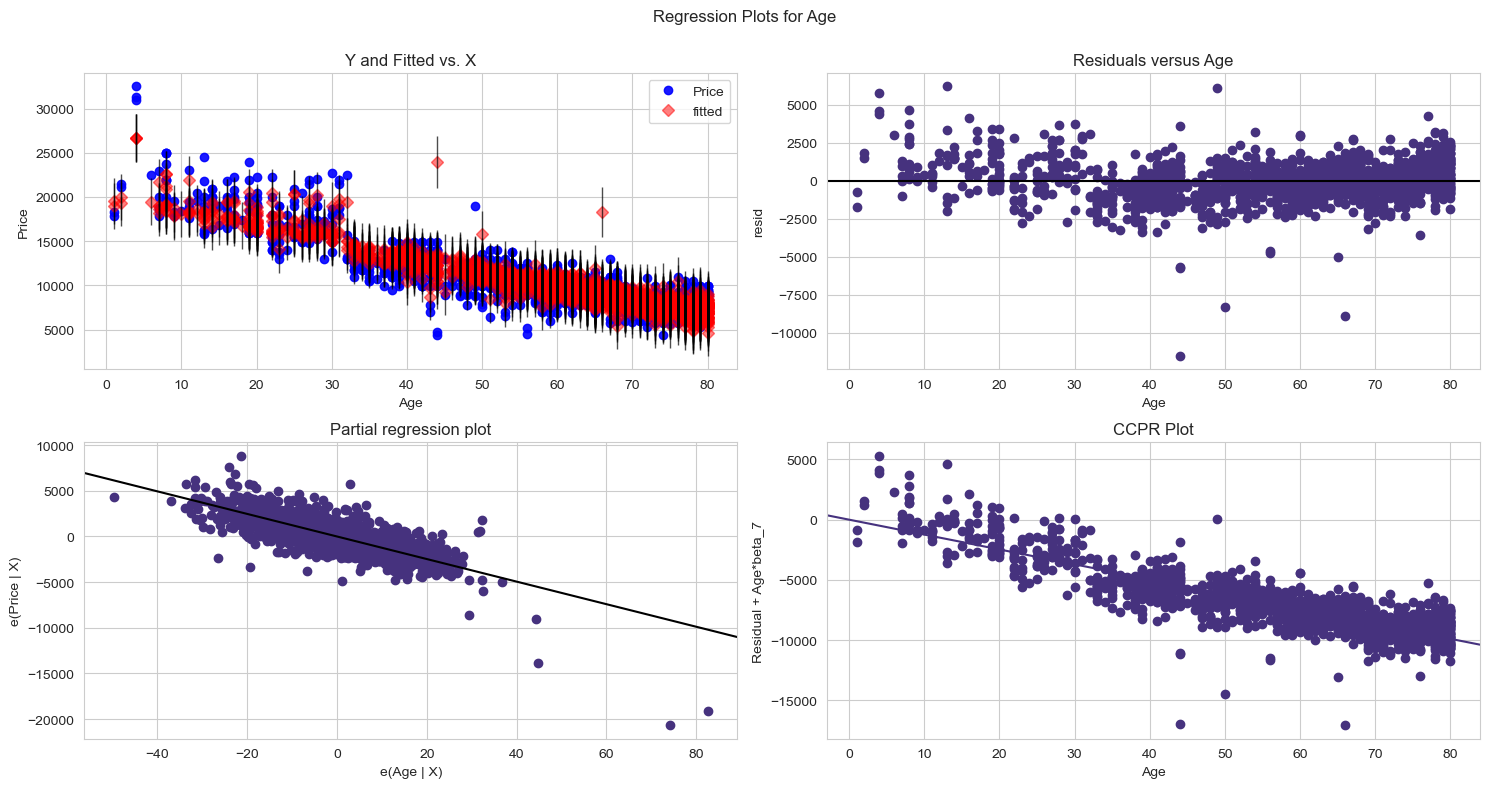

In [303]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Age", fig=fig)
plt.show()

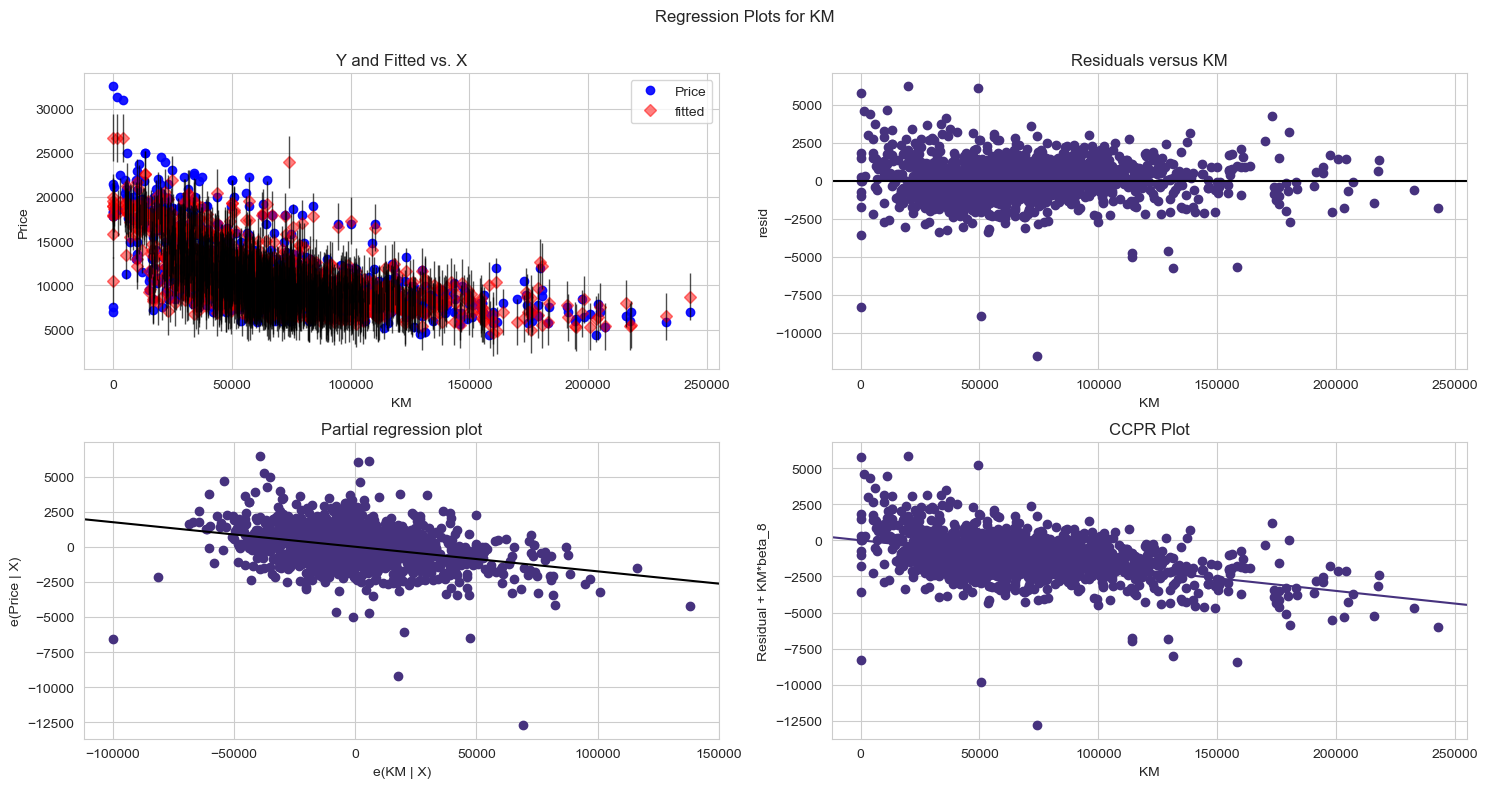

In [304]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "KM", fig=fig)
plt.show()

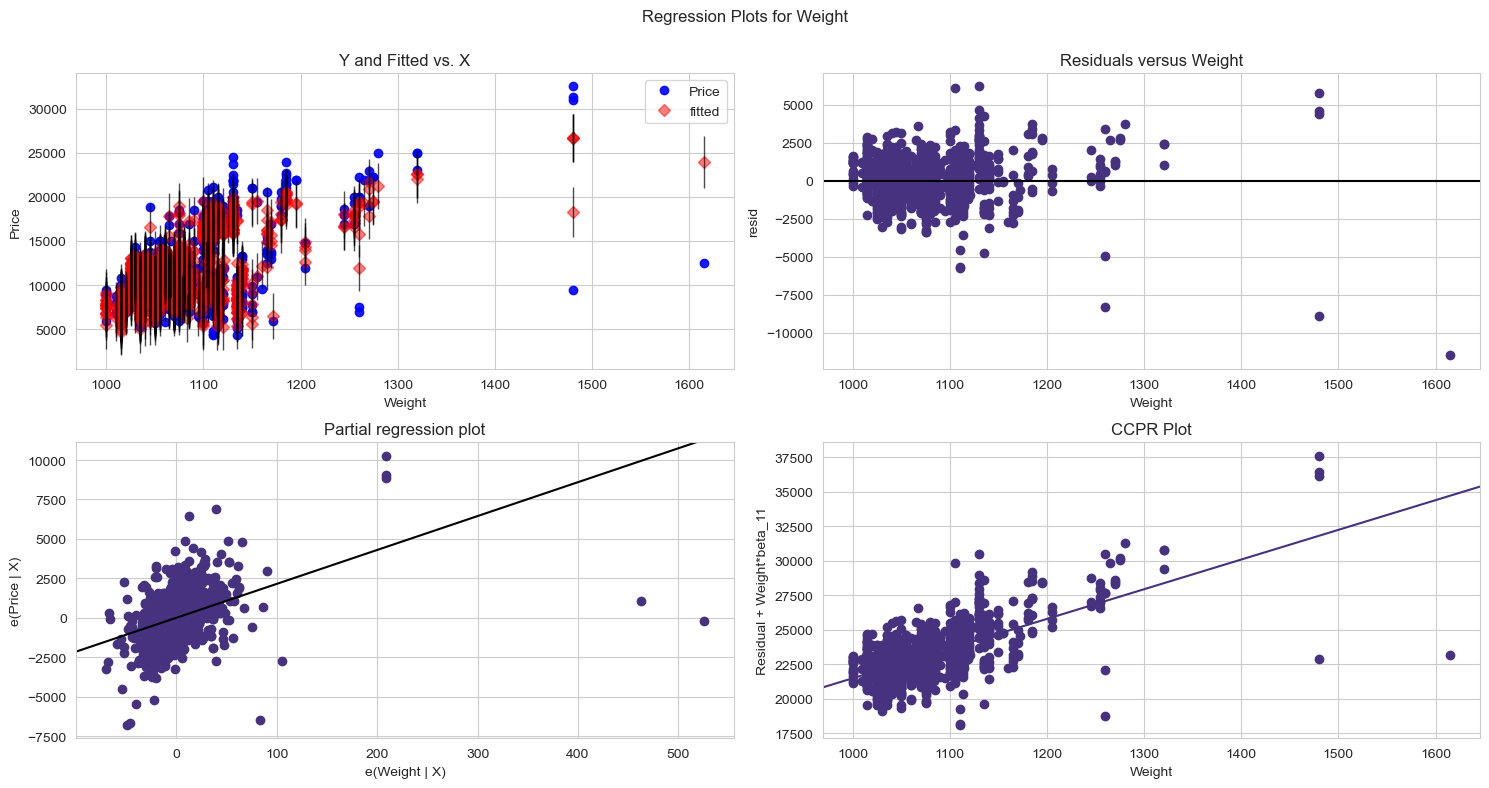

In [305]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Weight", fig=fig)
plt.show()

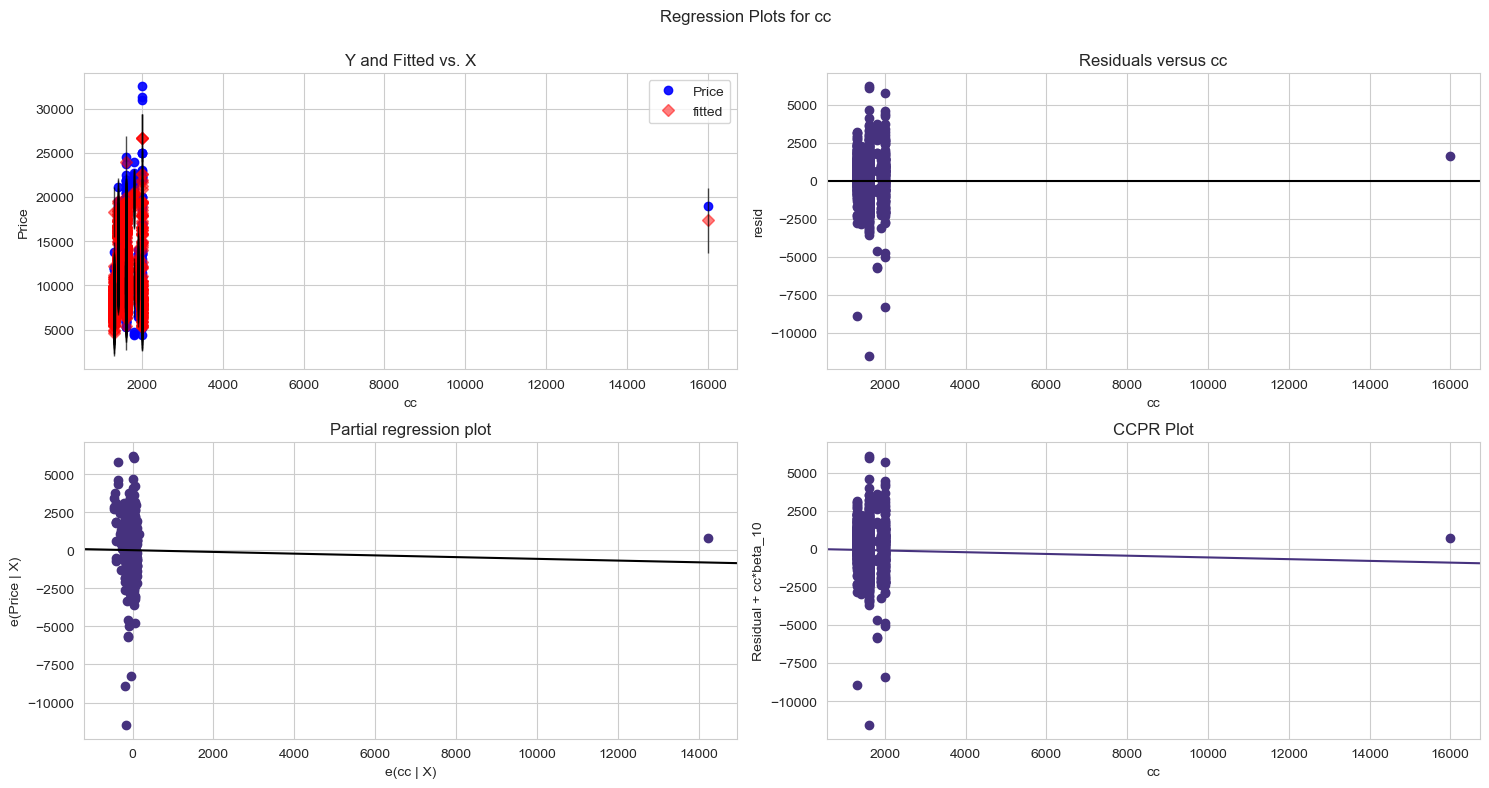

In [306]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "cc", fig=fig)
plt.show()

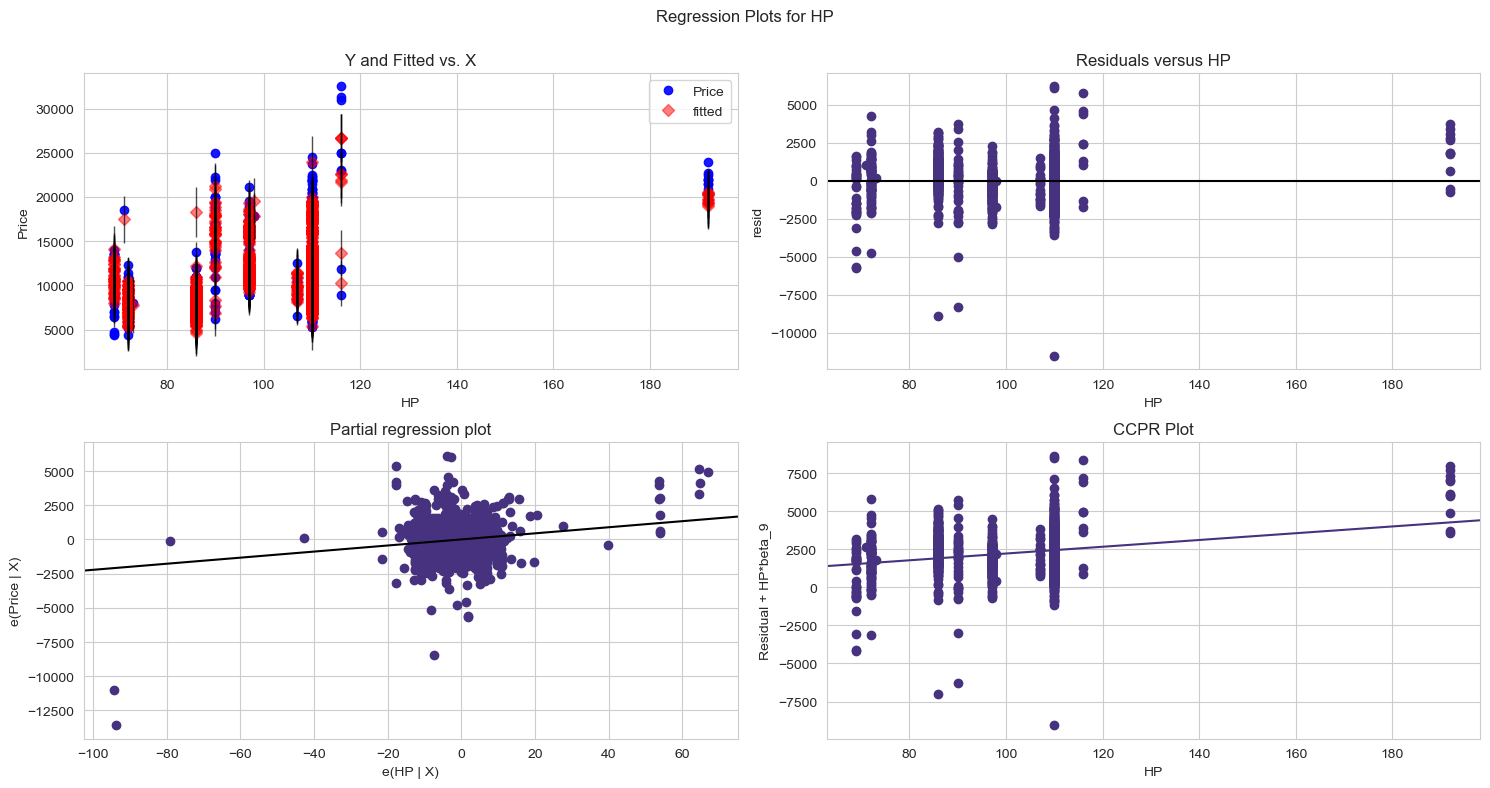

In [307]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "HP", fig=fig)
plt.show()

### Build Model

In [309]:
mlr = smf.ols('Price~Age+KM+HP+cc+Weight+Fuel_Type_Diesel+Fuel_Type_Petrol+Automatic+Doors+Gears',data=toyota)
model = mlr.fit()

In [310]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.865
Model:                            OLS   Adj. R-squared:                  0.864
Method:                 Least Squares   F-statistic:                     762.1
Date:                Fri, 07 Feb 2025   Prob (F-statistic):               0.00
Time:                        11:18:35   Log-Likelihood:                -12367.
No. Observations:                1436   AIC:                         2.476e+04
Df Residuals:                    1423   BIC:                         2.483e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                -1.024e+04   1836.982     -5.573      0.000   -1.38e+04   -6633.380
Fuel_Type_Diesel[T.True]   489.8450    383.504      1.277      0.202    -262.449    1242.139
Fuel_Type_Petrol[T.True]  1179.3317    338.753      3.481      0.001     514.823    1843.840
Automatic[T.1]             261.4072    161.962      1.614      0.107     -56.302     579.117
Doors[T.3]                -509.0788    948.311     -0.537      0.591   -2369.317    1351.160
Doors[T.4]                -278.6027    953.899     -0.292      0.770   -2149.802    1592.596
Doors[T.5]                -579.2299    949.179     -0.610      0.542   -2441.170    1282.710
Age                       -123.5778      2.630    -46.979      0.000    -128.738    -118.418
KM                          -0.0175      0.001    -13.158      0.000      -0.020      -0.015
HP                          22.2280      3.627      6.128      0.000      15.113      29.343
cc                          -0.0569      0.092     -0.619      0.536      -0.237       0.123
Weight                      21.4891      1.258     17.079      0.000      19.021      23.957
Gears                      653.1216    198.324      3.293      0.001     264.084    1042.160
==============================================================================
Omnibus:                      293.131   Durbin-Watson:                   1.619
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3294.632
Skew:                          -0.607   Prob(JB):                         0.00
Kurtosis:                      10.320   Cond. No.                     4.76e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.76e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## 2. Split the dataset into training and testing sets (e.g., 80% training, 20% testing).

In [312]:
from sklearn.model_selection import train_test_split

In [313]:
toyota.head()

,Price,Age,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
0,13500,23,46986,90,0,2000,3,4,5,1165,False,True,False
1,13750,23,72937,90,0,2000,3,4,5,1165,False,True,False
2,13950,24,41711,90,0,2000,3,4,5,1165,False,True,False
3,14950,26,48000,90,0,2000,3,4,5,1165,False,True,False
4,13750,30,38500,90,0,2000,3,4,5,1170,False,True,False


In [314]:
toyota.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Price             1436 non-null   int64   
 1   Age               1436 non-null   int64   
 2   KM                1436 non-null   int64   
 3   HP                1436 non-null   int64   
 4   Automatic         1436 non-null   category
 5   cc                1436 non-null   int64   
 6   Doors             1436 non-null   category
 7   Cylinders         1436 non-null   int64   
 8   Gears             1436 non-null   int64   
 9   Weight            1436 non-null   int64   
 10  Fuel_Type_CNG     1436 non-null   bool    
 11  Fuel_Type_Diesel  1436 non-null   bool    
 12  Fuel_Type_Petrol  1436 non-null   bool    
dtypes: bool(3), category(2), int64(8)
memory usage: 97.2 KB


In [315]:
X = toyota.iloc[:,1:]
y = toyota.iloc[:,0]

In [316]:
X.head()

,Age,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol
0,23,46986,90,0,2000,3,4,5,1165,False,True,False
1,23,72937,90,0,2000,3,4,5,1165,False,True,False
2,24,41711,90,0,2000,3,4,5,1165,False,True,False
3,26,48000,90,0,2000,3,4,5,1165,False,True,False
4,30,38500,90,0,2000,3,4,5,1170,False,True,False


In [317]:
y.head()

0    13500
1    13750
2    13950
3    14950
4    13750
Name: Price, dtype: int64

In [318]:
X_train, X_test, y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=40)
X_train.shape, X_test.shape, y_train.shape,y_test.shape

((1148, 12), (288, 12), (1148,), (288,))

## 3. Build a multiple linear regression model 

In [320]:
from sklearn.linear_model import LinearRegression

In [321]:
model = LinearRegression()

In [322]:
model.fit(X_train, y_train)

LinearRegression()

In [323]:
tr_predicted = model.predict(X_train)

## 4. Evaluate the performance of the model 

In [325]:
from sklearn.metrics import mean_squared_error,r2_score
import numpy as np

In [326]:
train_mse = mean_squared_error(y_train,tr_predicted )
train_mse

1796264.2265333484

In [327]:
tr_rmse = np.sqrt(train_mse)
tr_rmse

1340.2478228049276

In [328]:
test_predicted = model.predict(X_test)

In [329]:
test_mse = mean_squared_error(y_test,test_predicted )
test_mse

1768877.1743117266

In [330]:
test_rmse = np.sqrt(test_mse)
test_rmse

1329.9914188865005

In [331]:
y.mean()

10730.824512534818

## 5. Apply Lasso and Ridge methods on the model.

### Lasso method

### Create and train the Lasso model with regularization strength alpha=1.0

In [335]:
from sklearn.linear_model import Lasso

In [336]:
lasso_model = Lasso(alpha=1.0)

In [337]:
lasso_model.fit(X_train, y_train)

Lasso()

In [338]:
train_lasso_predictions = lasso_model.predict(X_train)

### Evaluate the performance of the model

In [340]:
train_lasso_mse = mean_squared_error(y_train, train_lasso_predictions)
train_lasso_mse

1796416.9766842455

In [341]:
train_lasso_rmse = np.sqrt(train_lasso_mse)

In [342]:
train_lasso_rmse

1340.3048073793682

In [343]:
test_lasso_predictions = lasso_model.predict(X_test)

In [344]:
test_lasso_mse = mean_squared_error(y_test, test_lasso_predictions)
test_lasso_mse

1764803.6318209232

In [345]:
test_lasso_rmse = np.sqrt(test_lasso_mse)
test_lasso_rmse

1328.4591193638303

## Ridge Method

## Create and train the Ridge model with regularization strength alpha=1.0

In [348]:
from sklearn.linear_model import Ridge

In [349]:
ridge_model = Ridge(alpha=1.0)

In [350]:
ridge_model.fit(X_train, y_train)

Ridge()

In [351]:
train_ridge_predictions = ridge_model.predict(X_train)

### Evaluate the performance of the model

In [353]:
train_ridge_mse = mean_squared_error(y_train, train_ridge_predictions)
train_ridge_mse

1796320.6442153663

In [354]:
train_ridge_rmse = np.sqrt(train_ridge_mse)
train_ridge_rmse

1340.2688701209793

In [355]:
test_ridge_predictions = ridge_model.predict(X_test)

In [356]:
test_ridge_mse = mean_squared_error(y_test, test_ridge_predictions)
test_ridge_mse

1766111.0138031028

In [357]:
test_ridge_rmse = np.sqrt(test_ridge_mse)
test_ridge_rmse

1328.9510953391411

## ElasticNet Regression

In [359]:
from sklearn.linear_model import ElasticNet

In [360]:
elastic = ElasticNet(l1_ratio = 1.0, alpha = 1.0)

In [361]:
elastic.fit(X_train, y_train)

ElasticNet(l1_ratio=1.0)

In [362]:
train_elastic_predictions = elastic.predict(X_train)

### Evaluate the performance of the model

In [364]:
train_elastic_mse = mean_squared_error(y_train, train_elastic_predictions)
train_elastic_mse

1796416.9766842455

In [365]:
train_elastic_rmse = np.sqrt(train_elastic_mse)
train_elastic_rmse

1340.3048073793682

In [366]:
test_elastic_predictions = ridge_model.predict(X_test)

In [367]:
test_elastic_mse = mean_squared_error(y_test, test_elastic_predictions)
test_elastic_mse

1766111.0138031028

In [368]:
test_elastic_rmse = np.sqrt(test_elastic_mse)
test_elastic_rmse

1328.9510953391411

## Interview Questions:

### 1. What is Normalization & Standardization and how is it helpful?

#### Normalization:
#### Rescales data between 0 and 1 (or -1 and 1).
#### It is Useful when you need everything in a uniform range, like for neural networks and KNN.

#### Standardization:
#### Converts data to have a mean of 0 and standard deviation of 1.
#### Works best for normally distributed data and algorithms like SVM and linear regression.

### 2. What techniques can be used to address multicollinearity in multiple linear regression?

#### Multicollinearity occurs when independent variables are highly correlated, leading to unreliable coefficient estimates.
#### 1. Variance Inflation Factor (VIF): Identify multicollinear variables. If VIF > 10, consider removing or transforming the variable. Removing #### Highly Correlated Variables:

#### Drop one of the highly correlated variables (based on correlation matrix).

#### Principal Component Analysis (PCA): Transform correlated variables into uncorrelated principal components.

#### Regularization (Ridge & Lasso Regression): Ridge Regression (L2 penalty) reduces coefficient values without eliminating variables.
#### Lasso Regression (L1 penalty) can shrink some coefficients to zero, effectively performing feature selection.